<a href="https://colab.research.google.com/github/cascon81/biomaterial-analyser/blob/main/Printabilidade_geral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving image3.png to image3 (7).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


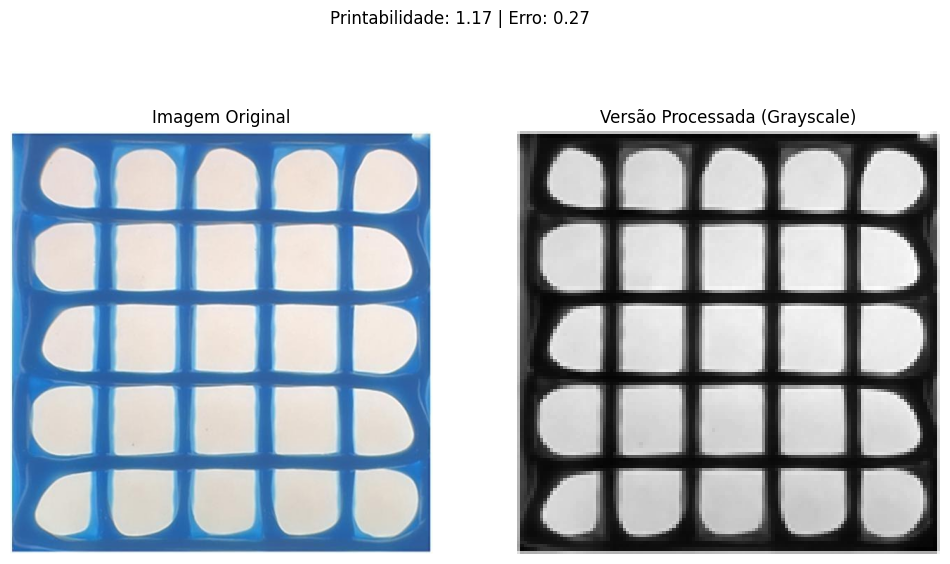

In [41]:
import tensorflow as tf
from PIL import Image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Carrega o modelo treinado
modelo = tf.keras.models.load_model('/content/Printabilidade_geral.keras')

# Função de pré-processamento (agora convertendo para grayscale como no treino)
def preprocessar_imagem(caminho):
    # Abre a imagem e converte para RGB (caso tenha canal alpha)
    img = Image.open(caminho).convert('RGB')

    # Redimensiona
    img = img.resize((128, 128))

    # Converte para array numpy e normaliza
    img_array = np.array(img) / 255.0

    # Converte para grayscale mantendo 3 canais (igual ao treino)
    img_gray = 0.299 * img_array[:,:,0] + 0.587 * img_array[:,:,1] + 0.114 * img_array[:,:,2]
    img_gray = np.stack([img_gray]*3, axis=-1)  # Converte para 3 canais iguais

    # Adiciona dimensão do batch
    img_gray = np.expand_dims(img_gray, axis=0)  # (1, 128, 128, 3)

    return img_gray

# Faz a predição e retorna os valores
def predizer(caminho):
    img = preprocessar_imagem(caminho)
    pred = modelo.predict(img)
    return pred[0][0], pred[0][1]  # [printabilidade, erro]

# Upload da imagem
uploaded = files.upload()

# Loop para cada imagem carregada
for filename in uploaded.keys():
    if filename.lower().endswith('.png'):  # Verifica se é PNG
        caminho = f'/content/{filename}'

        # Obtenha a predição
        printab, erro = predizer(caminho)

        # Exibição da imagem original e da versão processada
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Imagem original
        img_original = Image.open(caminho)
        ax1.imshow(img_original)
        ax1.set_title('Imagem Original')
        ax1.axis('off')

        # Imagem processada (grayscale)
        img_processada = preprocessar_imagem(caminho)[0]  # Remove a dimensão do batch
        ax2.imshow(img_processada[:,:,0], cmap='gray')  # Mostra apenas um canal
        ax2.set_title('Versão Processada (Grayscale)')
        ax2.axis('off')

        plt.suptitle(f"Printabilidade: {printab:.2f} | Erro: {erro:.2f}", y=1.05)
        plt.show()
    else:
        print(f"Arquivo {filename} ignorado. Por favor, envie uma imagem PNG.")
